In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
from dash import html,dcc,Input,Output,Dash

In [2]:
'''
Date - The date of the observation \n
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
'''
df = pd.read_csv('./dataset/avocado.csv')
df.head()
# df.info()





,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [50]:
app = Dash(__name__)

app.layout = html.Div(
    [
           dbc.Container(
           [
               html.Div(
               [
                   html.H1("Analytics Dashboard of Avocaodo (Dash Plotly)", style={"textAlign":"center"}),
                   html.Hr(),
                   html.P('Value Count By Selected Column:')
               ]),
               html.Br(),
               html.Div(
               [
                   dcc.Dropdown(
                       id='bag',
                       options=['type','region'], 
                       placeholder='Choose The Columns To Count...',
                       style={'width':'50%'},
                       persistence='string',
                       persistence_type='local'
                   )
               ]),
               html.Div(
               [
                   dcc.RadioItems(
                       id='ratio_item',
                       options=['Small Bags','Large Bags','XLarge Bags'],
                       inline=True,
                       persistence='string',
                       persistence_type='local'
                   ),
                   dcc.Graph(id='value_count_plot')
               ]),
               html.Div(
               [ 
                   dcc.Dropdown(
                       id='dropdown_line_region',
                       options=df.region.unique(),
                       persistence='string',
                       persistence_type='local',
                       style={'width':'50%'}
                   ),
                   dcc.Graph(id='date_trend_plot'),
               ]),
               html.Div(
               [
                   dcc.Graph(id='avocado_sold_plot')
               ]),
               html.Div(
               [
                   dcc.Checklist(id='checklist_region',options=df['region'].unique(),
                                 value=df['region'].unique()[0:5],inline=True),
                   dcc.Graph(id='value_count_bubble_plot')
               ])
           ])
    ])

@app.callback(
    Output('value_count_plot','figure'),
    Output('date_trend_plot','figure'),
    Output('avocado_sold_plot','figure'),
    Output('value_count_bubble_plot','figure'),
    Input('bag','value'),
    Input('ratio_item','value'),
    Input('dropdown_line_region','value'),
    Input('checklist_region','value')
)

def show_plot(dropdown,ratio,dropdown_region,checklist):
    volume = df.groupby(dropdown)[ratio].sum().rename_axis(dropdown).reset_index(name='Volume').sort_values(by='Volume',ascending=False).head(10)
    fig1 = px.bar(volume,x=dropdown,y='Volume',color=dropdown,title=f'Avocado Sold Volume By {dropdown} And {ratio}')
    
    price = df.loc[df['region'].isin([dropdown_region])].sort_values(by='Date')
    fig2 = px.line(price,x='Date',y='AveragePrice',color='type',title=f'AveragePrice By {dropdown_region} And Organic/Conventional')
    
    temp = df[df['region'] == dropdown_region]
    temp = temp[['Date','4046','4225','4770']].sort_values(by='Date').drop_duplicates(subset=['Date'],keep='first')
    fig3 = px.line(temp,x='Date',y=['4046','4225','4770'],title=f'Different Type Of Acovado Sold Volume By {dropdown_region}')
    fig3.update_layout(yaxis_title='Type of Acovado')

    temp = df.loc[df['region'].isin(checklist)]
    temp = temp[['Date','Total Volume','region']].sort_values(by='Date').drop_duplicates(subset=['Date'],keep='first')
    bubble = px.scatter_3d(temp,x='region',y='Date',z='Total Volume',color='Total Volume',
                         color_continuous_scale='Viridis',size='Total Volume',size_max=90)
    bubble.update_layout(height=800,width=800)
    return fig1,fig2,fig3,bubble

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False,port=3004)

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:3004/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Apr/2022 15:45:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:07] "GET /assets/css/bootstrap.min.css?m=1647935570.6230385 HTTP/1.1" 304 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "GET /_favicon.ico?v=2.3.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:08] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 15:45:15] "POST /_dash-u

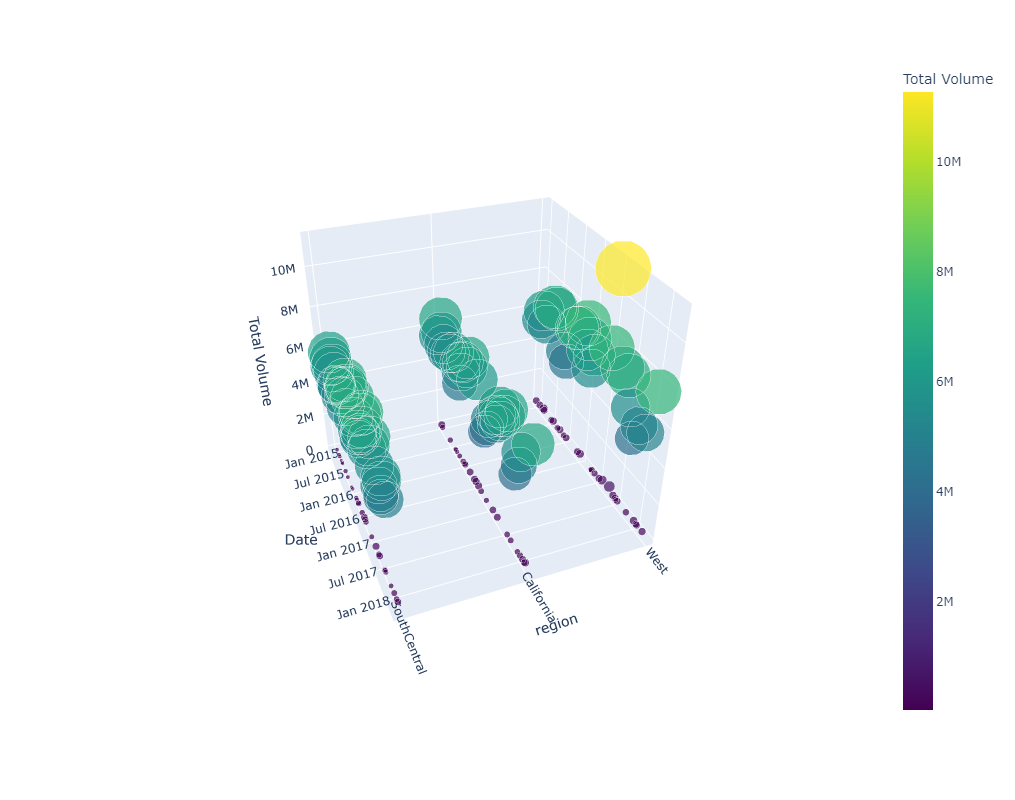

In [46]:
temp = df[(df['region'] == 'SouthCentral') | (df['region'] == 'West') | (df['region'] == 'California')]
temp = temp[['Date','4046','AveragePrice','Total Volume','region']].sort_values(by='Date').drop_duplicates(subset=['Date'],keep='first',)
fig3 = px.scatter_3d(temp,x='region',y='Date',z='Total Volume',color='Total Volume',
                     color_continuous_scale='Viridis',size='Total Volume',size_max=90)
fig3.update_layout(height=800,width=800)
# df.region.unique()

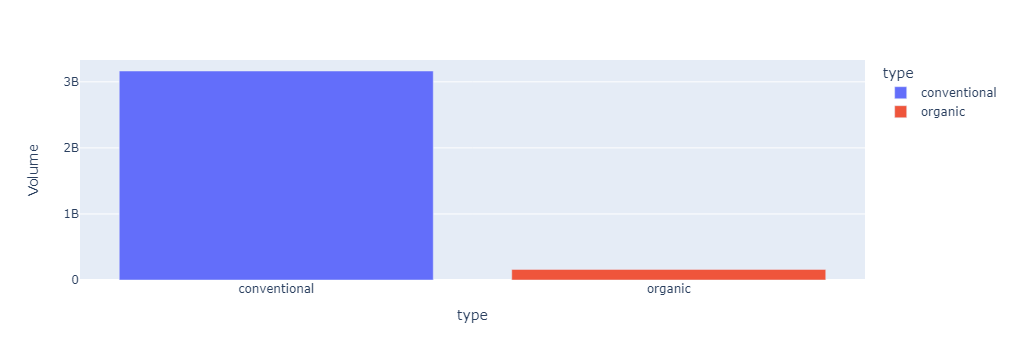

In [62]:
test = (df.groupby('type')['Small Bags'].sum().rename_axis('type').reset_index(name='Volume').sort_values(by='Volume',ascending=False)).head(10)
px.bar(test,x='type',y='Volume',color='type')

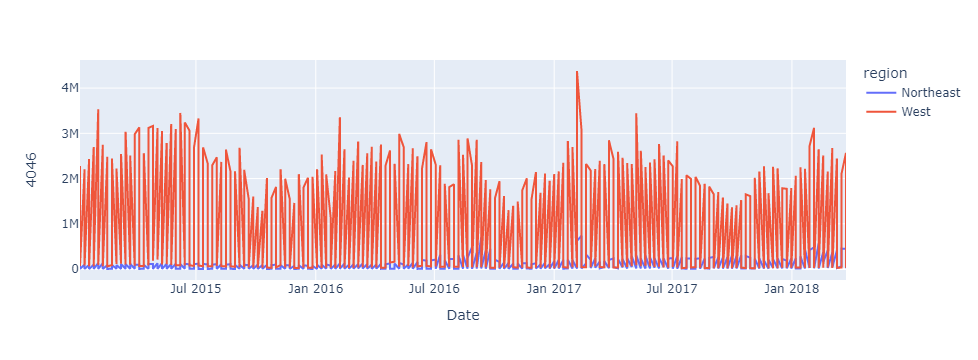

In [194]:
# 用出貨量決定要觀察哪些國家
# df.groupby('region')['Total Volume'].sum().reset_index().sort_values(by='Total Volume',ascending=False).head(10)

# 寫在dash用[].append要compare的對象
test = df.loc[df['region'].isin(['Northeast'])].sort_values(by='Date')
test2 = df.loc[df['region'].isin(['West'])].sort_values(by='Date')
f = px.line(test,x='Date',y='4046',color='region')
f.add_trace(go.Line(x=test2['Date'],y=test2['4046'],name='West'))
f
# bubble圖 用volume當作size

In [6]:
# test = df.groupby('region')['Total Volume'].sum().reset_index().sort_values(by='Total Volume',ascending=False).head(10)
# test.region
# f = px.line(df[df['region'] == 'TotalUS'].sort_values(by='Date'),x='Date',y='4046',color='region')
# f = px.line(df.sort_values(by='Date',ascending=False).head(10))
# test.region,x='Date',y='4046',color='region')
# f.add_traces

In [245]:
# for r in test.region:
#     print(df[df.region == r])
# df.groupby('region')['Total Volume'].sum().reset_index().sort_values(by='Total Volume',ascending=False).head(10)

In [246]:
# df[df.region in ['TotalUS','West','California','SouthCentral','Northeast']].sort_values(by='Date')
# df.loc[df['region'].isin(['TotalUS','West','California','SouthCentral','Northeast'])].sort_values(by='Date')


In [255]:
temp = df[df['region'] == 'Albany']
# temp[['Date','4046']].sort_values(by='Date').drop_duplicates(subset=['Date'],keep='first')
px.line(temp[['Date','4046']].sort_values(by='Date').drop_duplicates(subset=['Date'],keep='first'),x='Date')
temp[['Date','4046']].sort_values(by='Date').drop_duplicates(subset=['Date'],keep='first')
# df.info()

,Date,4046
51,2015-01-04,2819.50
50,2015-01-11,1002.85
49,2015-01-18,914.14
48,2015-01-25,941.38
47,2015-02-01,1353.90
...,...,...
8482,2018-02-25,10368.77
8481,2018-03-04,12002.12
8480,2018-03-11,15823.35
17602,2018-03-18,275.89


In [2]:
%config Completer.use_jedi = False

In [ ]:
import pa